In [6]:
import os
import Ouzo_Sampling_Wtf_Lattice_Volume as create
import matplotlib.pyplot as plt
import numpy as np
import OT2_Ouzo_Commands as ot2_commands
from opentrons import simulate, execute, protocol_api

In [34]:
experiment_dict = create.get_experiment_plan(r"C:\Users\Edwin\Desktop\Repos\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Run09242020\09_24_2020_E_P_Scan.csv") # Intialize master dictionary from excel sheet
component_dict = create.dict_creator(experiment_dict, 'Component') # Gather all information concerning components into one dictionary
stock_dict = create.dict_creator(experiment_dict, 'Stock') 
opentrons_dict = create.dict_creator(experiment_dict, 'OT2')

In [35]:
total_sample_mass = experiment_dict['Sample Mass']
wtf_sample_canidates = create.generate_candidate_lattice_concentrations(component_dict) # there is a built in filter for anything summing to over 1, could be somewhat informative
sample_stock_volumes = create.calculate_volumes(total_sample_mass, wtf_sample_canidates, component_dict, stock_dict) # created in uL
filtered_wtf_samples, filtered_volume_samples = create.filter_samples(wtf_sample_canidates, sample_stock_volumes, 30, 1000)
print('sample filtered out =', len(sample_stock_volumes)-len(filtered_volume_samples))
print('samples remaining =', len(filtered_volume_samples))

sample filtered out = 59
samples remaining = 41


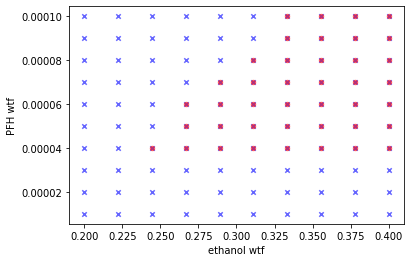

In [36]:
wtf_sample_canidates_rearranged = create.rearrange(wtf_sample_canidates)
wtf_final_samples_rearranged = create.rearrange(filtered_wtf_samples)

marker_size = 20

x_index = 3
x_component_name = component_dict['Component Shorthand Names'][x_index]

y_index = 2
y_component_name = component_dict['Component Shorthand Names'][y_index]

# Plot all canidates
plt.scatter(wtf_sample_canidates_rearranged[x_index], 
            wtf_sample_canidates_rearranged[y_index], 
            marker_size, alpha = 0.6, marker = 'x', color = 'b')

# Plot samples actually made 
plt.scatter(wtf_final_samples_rearranged[x_index], # could automate by looking at the experiment names
            wtf_final_samples_rearranged[y_index], 
            marker_size, alpha = 0.5, marker = 'o', color = 'r')


plt.xlabel(x_component_name + ' wtf')
plt.ylabel(y_component_name + ' wtf')

# could print on graph other useful information like the concentration of the other components.
# plt.xlim([0,0.0012])
# plt.ylim([0,1])
plt.autoscale(True)
plt.show()
# index refers to order of list in csv file



In [27]:
component_volume_lists = create.rearrange(filtered_volume_samples)
protocol = simulate.get_protocol_api('2.0')
ot2_commands.run(protocol, experiment_dict, opentrons_dict, component_volume_lists) # alright cmon wig!

C:\Users\Edwin\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\Edwin\.opentrons\robot_settings.json not found. Loading defaults


FileNotFoundError: Unable to find a labware
        definition for "falcon_48_wellplate_800ul",
        version 1, in the opentrons namespace.
        Please confirm your protocol includes the correct
        labware spelling and (optionally) the correct version
        number and namespace.

        If you are referencing a custom labware in your
        protocol, you must add it to your Custom Labware
        Definitions Folder from the Opentrons App before
        uploading your protocol.
        